In [7]:
import pandas as pd 
from binance.client import Client
client=Client()

In [15]:
def getdata(symbol,start):
    frame=pd.DataFrame(client.get_historical_klines(symbol,
                                                    '1h',
                                                    start))
    frame=frame.iloc[:,:6]
    frame.columns=['Time','Open','High','Low','Close','Volume']
    frame.set_index('Time',inplace=True)
    frame.index=pd.to_datetime(frame.index,unit='ms')
    return frame

In [16]:
df=getdata('BTCUSDT','2020-01-01')
df

,Open,High,Low,Close,Volume
Time,,,,,
2020-01-01 00:00:00,7195.24000000,7196.25000000,7175.46000000,7177.02000000,511.81490100
2020-01-01 01:00:00,7176.47000000,7230.00000000,7175.71000000,7216.27000000,883.05260300
2020-01-01 02:00:00,7215.52000000,7244.87000000,7211.41000000,7242.85000000,655.15680900
2020-01-01 03:00:00,7242.66000000,7245.00000000,7220.00000000,7225.01000000,783.72486700
2020-01-01 04:00:00,7225.00000000,7230.00000000,7215.03000000,7217.27000000,467.81257800
...,...,...,...,...,...
2025-07-31 03:00:00,118447.52000000,118600.00000000,118385.00000000,118466.14000000,458.32072000
2025-07-31 04:00:00,118466.15000000,118550.00000000,118364.13000000,118511.53000000,359.32077000
2025-07-31 05:00:00,118511.52000000,118540.00000000,118331.63000000,118362.00000000,277.83295000


In [17]:
df['price']=df.Open.shift(-1)
df

,Open,High,Low,Close,Volume,price
Time,,,,,,
2020-01-01 00:00:00,7195.24000000,7196.25000000,7175.46000000,7177.02000000,511.81490100,7176.47000000
2020-01-01 01:00:00,7176.47000000,7230.00000000,7175.71000000,7216.27000000,883.05260300,7215.52000000
2020-01-01 02:00:00,7215.52000000,7244.87000000,7211.41000000,7242.85000000,655.15680900,7242.66000000
2020-01-01 03:00:00,7242.66000000,7245.00000000,7220.00000000,7225.01000000,783.72486700,7225.00000000
2020-01-01 04:00:00,7225.00000000,7230.00000000,7215.03000000,7217.27000000,467.81257800,7217.26000000
...,...,...,...,...,...,...
2025-07-31 03:00:00,118447.52000000,118600.00000000,118385.00000000,118466.14000000,458.32072000,118466.15000000
2025-07-31 04:00:00,118466.15000000,118550.00000000,118364.13000000,118511.53000000,359.32077000,118511.52000000
2025-07-31 05:00:00,118511.52000000,118540.00000000,118331.63000000,118362.00000000,277.83295000,118362.01000000


In [18]:
df = df.astype(float)
df

,Open,High,Low,Close,Volume,price
Time,,,,,,
2020-01-01 00:00:00,7195.24,7196.25,7175.46,7177.02,511.814901,7176.47
2020-01-01 01:00:00,7176.47,7230.00,7175.71,7216.27,883.052603,7215.52
2020-01-01 02:00:00,7215.52,7244.87,7211.41,7242.85,655.156809,7242.66
2020-01-01 03:00:00,7242.66,7245.00,7220.00,7225.01,783.724867,7225.00
2020-01-01 04:00:00,7225.00,7230.00,7215.03,7217.27,467.812578,7217.26
...,...,...,...,...,...,...
2025-07-31 03:00:00,118447.52,118600.00,118385.00,118466.14,458.320720,118466.15
2025-07-31 04:00:00,118466.15,118550.00,118364.13,118511.53,359.320770,118511.52
2025-07-31 05:00:00,118511.52,118540.00,118331.63,118362.00,277.832950,118362.01


In [19]:
df['ret']=df.Close.pct_change()
df

,Open,High,Low,Close,Volume,price,ret
Time,,,,,,,
2020-01-01 00:00:00,7195.24,7196.25,7175.46,7177.02,511.814901,7176.47,NaN
2020-01-01 01:00:00,7176.47,7230.00,7175.71,7216.27,883.052603,7215.52,0.005469
2020-01-01 02:00:00,7215.52,7244.87,7211.41,7242.85,655.156809,7242.66,0.003683
2020-01-01 03:00:00,7242.66,7245.00,7220.00,7225.01,783.724867,7225.00,-0.002463
2020-01-01 04:00:00,7225.00,7230.00,7215.03,7217.27,467.812578,7217.26,-0.001071
...,...,...,...,...,...,...,...
2025-07-31 03:00:00,118447.52,118600.00,118385.00,118466.14,458.320720,118466.15,0.000157
2025-07-31 04:00:00,118466.15,118550.00,118364.13,118511.53,359.320770,118511.52,0.000383
2025-07-31 05:00:00,118511.52,118540.00,118331.63,118362.00,277.832950,118362.01,-0.001262


In [20]:
profits=[]
in_position=False

for index,row in df.iterrows():
    if not in_position and row.ret>0.01:
        buyprice=row.price
        in_position=True
        trailing_stop=buyprice*0.97
    if in_position:
        if row.Close*0.97>=trailing_stop:
            trailing_stop=row.Close*0.97
        if row.Close<=trailing_stop:
            sellprice=row.price
            profit=(sellprice-buyprice)/buyprice-0.0015
            profits.append(float(profit))
            in_position=False

In [21]:
len(profits)

666

<Axes: >

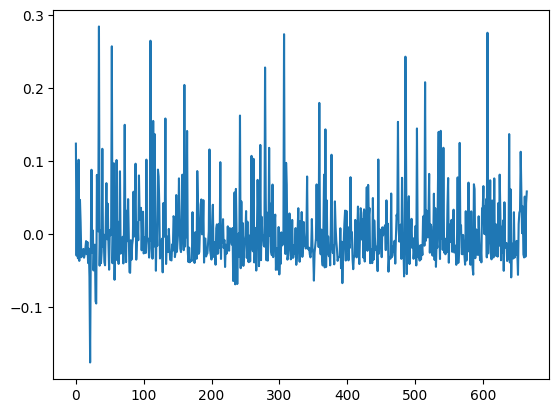

In [22]:
pd.Series(profits).plot()

<Axes: >

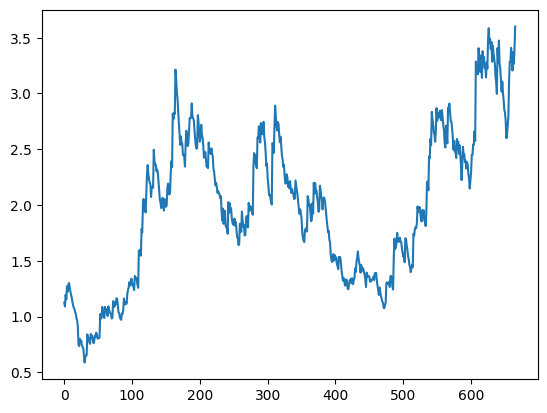

In [23]:
(pd.Series(profits)+1).cumprod().plot()

In [24]:
(pd.Series(profits)+1).cumprod()#.plot()

0      1.123989
1      1.090416
2      1.193946
3      1.153935
4      1.271497
         ...   
661    3.206254
662    3.370629
663    3.264704
664    3.402657
665    3.601004
Length: 666, dtype: float64

<Axes: >

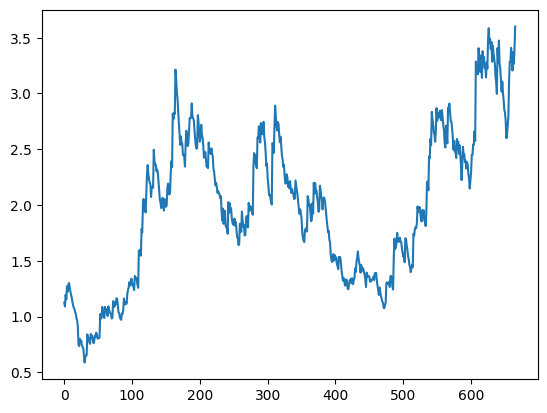

In [25]:
(pd.Series(profits)+1).cumprod().plot()

<Axes: xlabel='Time'>

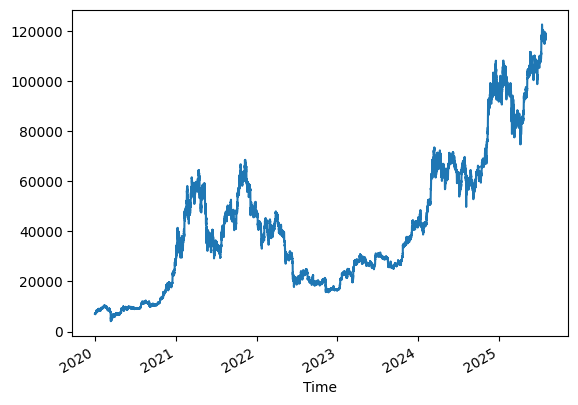

In [26]:
df['Close'].plot()